# comparing closeness of location and social schemas

## based on 26

### 2/11/21

In [11]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.plotly as py
import plotly
import os
import glob
import math
import statistics
import matplotlib.pyplot as plt
import pickle
import copy
from random import randrange
from sklearn.metrics import jaccard_score
import random
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
from scipy import stats
import umap
import umap.plot

from sklearn.decomposition import PCA #for cluster analysis
import matplotlib.pyplot as plt #for plotting
import os #for importing
import pickle #for loading transcripts
from scipy.stats import pearsonr 


%autosave 5

Autosaving every 5 seconds


# 0. Importing story and template vectors and sums 

In [5]:
templates = pickle.load( open( 'c_template', "rb" ) )

# correlate the schemas, loc first and then soc

In [6]:
schema_order = [1, 2, 3, 4, 10, 20, 30, 40]

schema_corr = np.zeros((8,8))

for i in range(0, 8):
    main = templates[schema_order[i]]
    main = main.reshape(main.shape[0],-1)
    for j in range(0,8):
        second = templates[schema_order[j]]
        second = second.reshape(second.shape[0],-1)
        schema_corr[i,j] = np.corrcoef(main.T, second.T)[0,1]
        

# plot

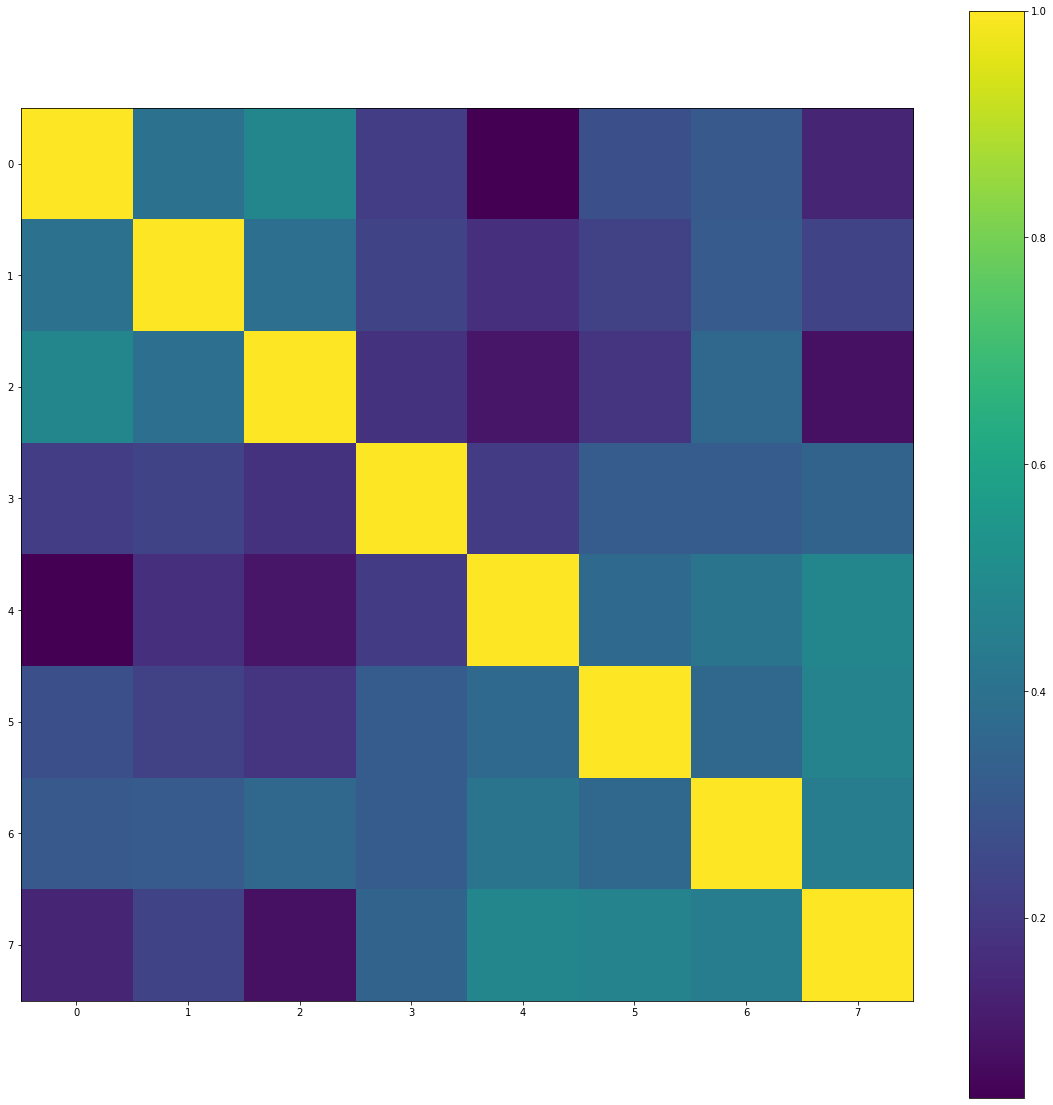

In [13]:
fig, ax = plt.subplots(1,1, figsize=(20,20))
im = ax.imshow(schema_corr)

fig.colorbar(im)

# avg correlation within different schema types

In [36]:
loc_vals = schema_corr[0:4,0:4]
loc_mean = np.mean(loc_vals[np.triu_indices(4, k = 1)])

soc_vals = schema_corr[4:8,4:8]
soc_mean = np.mean(soc_vals[np.triu_indices(4, k = 1)])

mix_vals = schema_corr[0:4, 4:8]
mix_mean = np.mean(mix_vals)

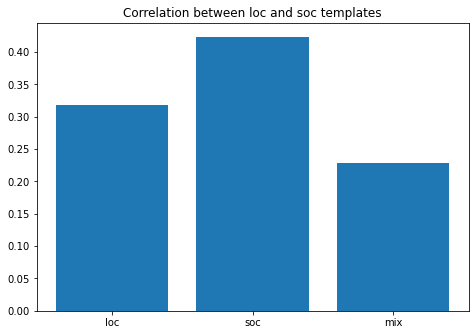

In [41]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
stype = ['loc', 'soc', 'mix']
mean = [loc_mean, soc_mean, mix_mean]
ax.bar(stype,mean)
plt.title('Correlation between loc and soc templates')
plt.show()

# UMAP

/Users/alexreblando/opt/anaconda3/envs/firstEnv/lib/python3.7/site-packages/umap/umap_.py:2214: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



<AxesSubplot:>

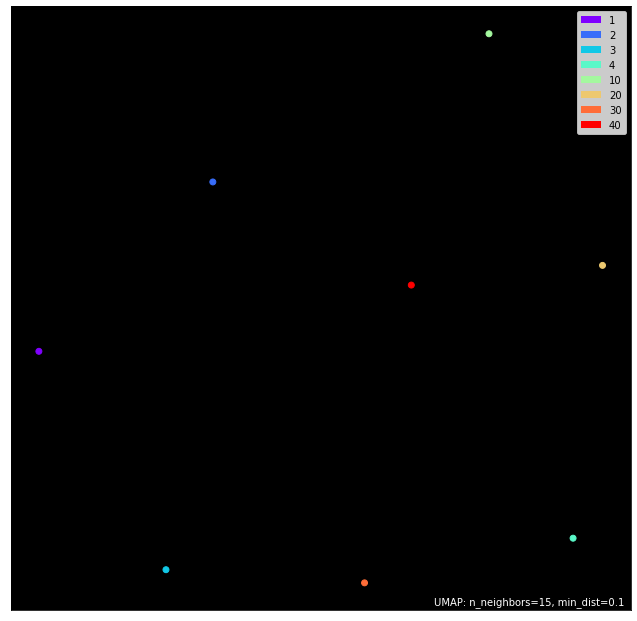

In [18]:
all_sch = np.zeros((0,300))

for key in schema_order:
    this_sch = templates[key].reshape(templates[key].shape[0],-1).T
    all_sch = np.vstack((all_sch, this_sch))
    

all_labels = np.array(['loc', 'loc', 'loc', 'loc', 'soc', 'soc', 'soc', 'soc'])  
spec_labels = np.array([1, 2, 3, 4, 10, 20, 30, 40])
mapper = umap.UMAP().fit(all_sch)
umap.plot.points(mapper, labels=spec_labels, theme = 'fire')